## Assignment -2 – Evaluation -7 Feature Dimension Reduction Using Singular Value Decomposition (SVD) and Classification Using Logistic Regression

In [1]:
from sklearn.datasets import load_digits           # We use this library to get the MNIST digits dataset
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix

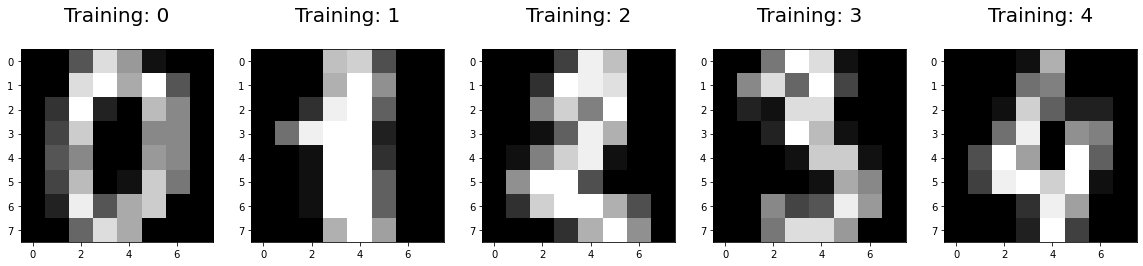

In [2]:
digits = load_digits()
plt.figure(figsize=(20,4))               # To view the dataset
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

### Q1) For the MNIST dataset, apply the feature reduction using singular value decomposition (SVD).

In [3]:
print(digits.data.shape)    # Data column

print(digits.target.shape)  # Target value (predicting the digit) column


# We split dataset for training and testing in 75:25 split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)   


(1797, 64)
(1797,)


Using the svd function we split the data into 3 parts u, v and sigma matrices.

In [4]:
u,s,v=np.linalg.svd(digits['data'])    # using the svd function from linear algebra library in numpy, we split the dataset into 3 matrices u,s and v.
print(u.shape)
print(np.diag(s).shape)
print(v.shape)

(1797, 1797)
(64, 64)
(64, 64)


### Q2) Classify the dataset using logistic regression before applying the feature reduction.

In [5]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
predictions = lr.predict(x_test)

In [7]:
score = lr.score(x_test, y_test)
print(score)

0.9511111111111111


### Q3) .Classify the dataset using logistic regression after applying the feature reduction using SVD. 

In [8]:
u,s,v=np.linalg.svd(x_train)
lowrank=u[:, :17] @np.diag(s[:17]) @ v[:17,:]   # An example of 17 features was taken to show how the score was changing.
print(lowrank.shape)           # Shape is retained

# Applying the logistic regression algorithm onto the new train data,lowrank
lr.fit(lowrank, y_train)
predictions = lr.predict(x_test) 

score = lr.score(x_test, y_test)*100
print(score)

(1347, 64)
93.33333333333333


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Q4)  Find the optimal feature dimension based on the accuracy. 

The training set is split using svd with the split including each feature one at a time. Then with the logistic regression algorithm,the train set is fit and tested on the test set. The score for each feature inclusion is stored in the svd_scores list. A bar plot is used to show the increase/decrease in accuracies with each feature inclusion.

In [9]:
svd_scores=[]   # List to store the scores for each feature addition
u_tr,s_tr,v_tr=np.linalg.svd(x_train)  # train set is split using svd

for i in range(1,64,1):

    # Taking i rows of u matrix, i diagonal elements in s matrix and i columns in v matrix and multiplying to get the full rank matrix
    lowrank_train=u_tr[:, :i] @np.diag(s_tr[:i]) @ v_tr[:i,:] 

    # Fit the model and predict wiht test set
    lr.fit(lowrank_train, y_train)
    predictions = lr.predict(x_test)
    svd_scores.append(round(lr.score(x_test, y_test)*100,2))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [10]:
rg=range(1,64,1)  # for range values in x axis
df2=pd.DataFrame(svd_scores,rg) 
maxi=df2[0].idxmax() # to get the index pf the maximum accuracy
print("Maximum accuracy obtained is ",df2[0].max()," at number of features = ",maxi)

Maximum accuracy obtained is  95.78  at number of features =  32


<BarContainer object of 63 artists>

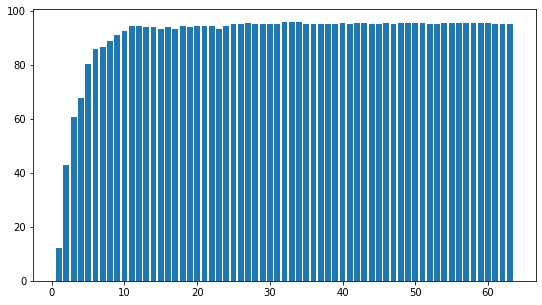

In [11]:
# Plot to visualize
plt.figure(figsize=(9,5))  
plt.bar(rg,svd_scores)

### Q5) . For the optimal feature dimension, evaluate the model before and after applying the feature dimension based on Precision, Recall and F1-Score for each class

Since the optimal number of feature dimension is found to be 32. We find the precision,recall and f1 score based on the training set with and without svd and then compare the results.

#### Without svd

In [12]:
lr.fit(x_train,y_train)
predictions=lr.predict(x_test)
score= round(lr.score(x_test, y_test)*100,2)
print(score)

95.11


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
c_b=confusion_matrix(y_true=y_test, y_pred=predictions)

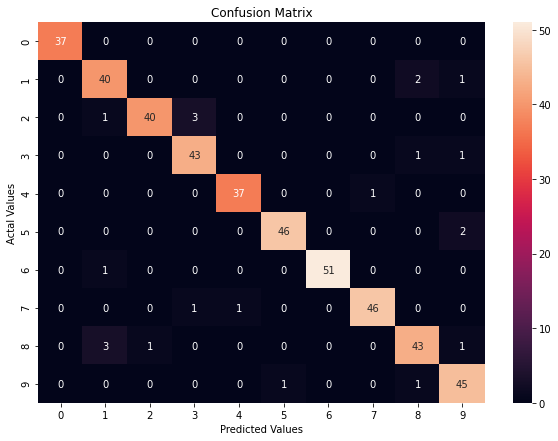

In [14]:
# Plotting to visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(c_b, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

1. Precision=True positive/(True positive + False Positive)

Precision gives the proportion of predicted digits that is truly the correct digits classified.
2. Recall=True Positve/(True positive + False Negative)

Recall gives the actual digits that are correcty classified
3. F1 score= Harmonic mean of Precision and Recall = (2 * Precision * Recall)/(Precision + Recall)

In [15]:
actual=c_b.sum(axis=0)
pred=c_b.sum(axis=1)

precision=[]
recall=[]
f1=[]
for i in range(c_b.shape[0]):
    p=round(c_b[i][i]/actual[i],2)*100
    precision.append(p)
    r=round(c_b[i][i]/pred[i],2)*100
    recall.append(r)
    f1.append(round((2*p*r)/(p+r),2))
    
    
before_metrics=pd.DataFrame(list(zip(precision,recall,f1)),columns=['Precision','Recall','F1 score'])
before_metrics

,Precision,Recall,F1 score
0,100.0,100.0,100.00
1,89.0,93.0,90.96
2,98.0,91.0,94.37
3,91.0,96.0,93.43
4,97.0,97.0,97.00
5,98.0,96.0,96.99
6,100.0,98.0,98.99
7,98.0,96.0,96.99
8,91.0,90.0,90.50
9,90.0,96.0,92.90


#### With SVD and optimal number of features =32

In [16]:
u,s,v=np.linalg.svd(x_train)
lowrank=u[:, :32] @np.diag(s[:32]) @ v[:32,:]   

# Applying the logistic regression algorithm onto the new train data,lowrank
lr.fit(lowrank, y_train)
predictions = lr.predict(x_test) 

score = round(lr.score(x_test, y_test)*100,2)
print(score)

95.78


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
c=confusion_matrix(y_true=y_test, y_pred=predictions)

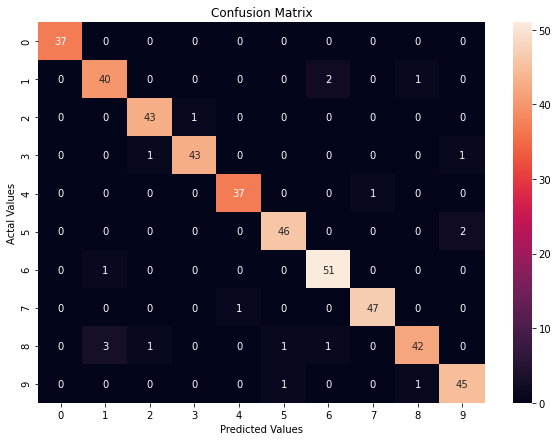

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(c, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [19]:
actual=c.sum(axis=0)
pred=c.sum(axis=1)

precision=[]
recall=[]
f1=[]
for i in range(c.shape[0]):
    p=round(c[i][i]/actual[i],2)*100
    precision.append(p)
    r=round(c[i][i]/pred[i],2)*100
    recall.append(r)
    f1.append(round((2*p*r)/(p+r),2))    
    
after_metrics=pd.DataFrame(list(zip(precision,recall,f1)),columns=['Precision','Recall','F1 score'])
after_metrics

,Precision,Recall,F1 score
0,100.0,100.0,100.00
1,91.0,93.0,91.99
2,96.0,98.0,96.99
3,98.0,96.0,96.99
4,97.0,97.0,97.00
5,96.0,96.0,96.00
6,94.0,98.0,95.96
7,98.0,98.0,98.00
8,95.0,88.0,91.37
9,94.0,96.0,94.99


Obervations: 

For certain digits like 1, Before applying SVD, the Precision was comparitively low (89) meaning that the predicted digits were not accurate, but after SVD, the precision rose to 91.Overall, After applying svd, all three metrics show improvement